In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = h5py.File("beta1.hdf5")
data2 = h5py.File("beta2.hdf5")
data3 = h5py.File("beta3.hdf5")

particles1 = data1["PartType0"]
particles2 = data2["PartType0"]
particles3 = data3["PartType0"]

In [3]:
pos1 = particles1["Coordinates"]
vel1 = particles1["Velocities"]
pos2 = particles2["Coordinates"]
vel2 = particles2["Velocities"]
pos3 = particles3["Coordinates"]
vel3 = particles3["Velocities"]

In [6]:
posSplit1 = np.array_split(pos1, 3, axis=1)
posSplit2 = np.array_split(pos2, 3, axis=1)
posSplit3 = np.array_split(pos3, 3, axis=1)
x1 = posSplit1[0].reshape(len(particles1["Masses"]))
x2 = posSplit2[0].reshape(len(particles2["Masses"]))
x3 = posSplit3[0].reshape(len(particles3["Masses"]))
#y = posSplit[1].reshape(len(particles["Masses"]))
#z = posSplit[2].reshape(len(particles["Masses"]))

velSplit1 = np.array_split(vel1, 3, axis=1)
vx1 = velSplit1[0].reshape(len(particles1["Masses"])) * 36447.2682
vy1 = velSplit1[1].reshape(len(particles1["Masses"])) * 36447.2682
vz1 = velSplit1[2].reshape(len(particles1["Masses"])) * 36447.2682
k1 = np.sum((vx1**2 + vy1**2 + vz1**2) * particles1["Masses"])

velSplit2 = np.array_split(vel2, 3, axis=1)
vx2 = velSplit2[0].reshape(len(particles2["Masses"])) * 36447.2682
vy2 = velSplit2[1].reshape(len(particles2["Masses"])) * 36447.2682
vz2 = velSplit2[2].reshape(len(particles2["Masses"])) * 36447.2682
k2 = np.sum((vx2**2 + vy2**2 + vz2**2) * particles2["Masses"])

velSplit3 = np.array_split(vel3, 3, axis=1)
vx3 = velSplit3[0].reshape(len(particles3["Masses"])) * 36447.2682
vy3 = velSplit3[1].reshape(len(particles3["Masses"])) * 36447.2682
vz3 = velSplit3[2].reshape(len(particles3["Masses"])) * 36447.2682
k3 = np.sum((vx3**2 + vy3**2 + vz3**2) * particles3["Masses"])

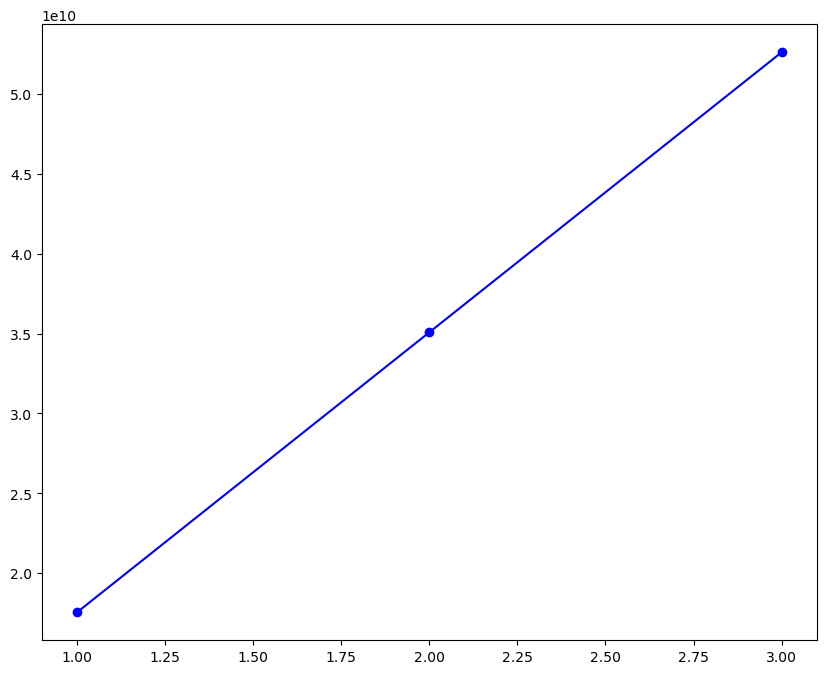

In [8]:
plt.figure(figsize=(10,8))
plt.plot([1,2,3], [k1, k2, k3], "bo-")

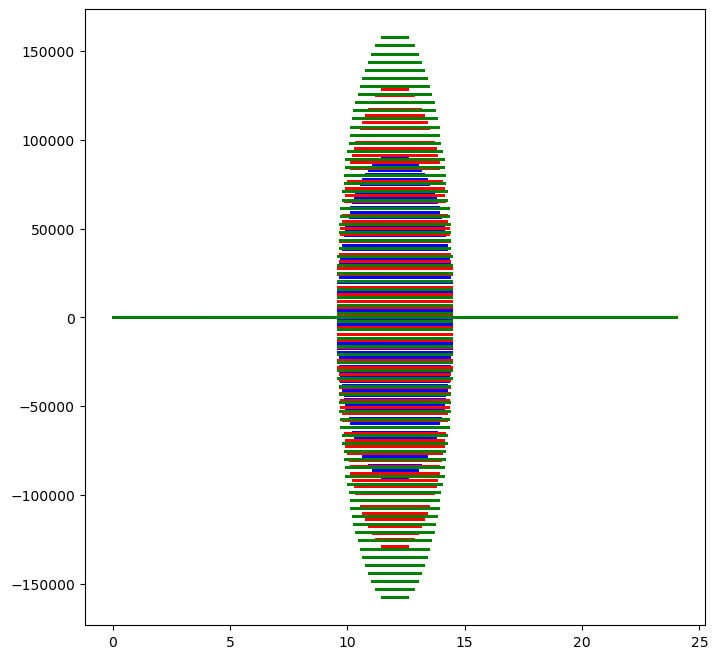

In [5]:
plt.figure(figsize=(8,8))
plt.plot(x1, vx1, "bo", markersize=1)
plt.plot(x2, vx2, "ro", markersize=1)
plt.plot(x3, vx3, "go", markersize=1)

/var/folders/hq/p_tw4dkd06j3b79xb0rpp_lh0000gp/T/ipykernel_8787/2457131654.py:6: RuntimeWarning: invalid value encountered in divide
  finalHist = weightedHist/histNumbers


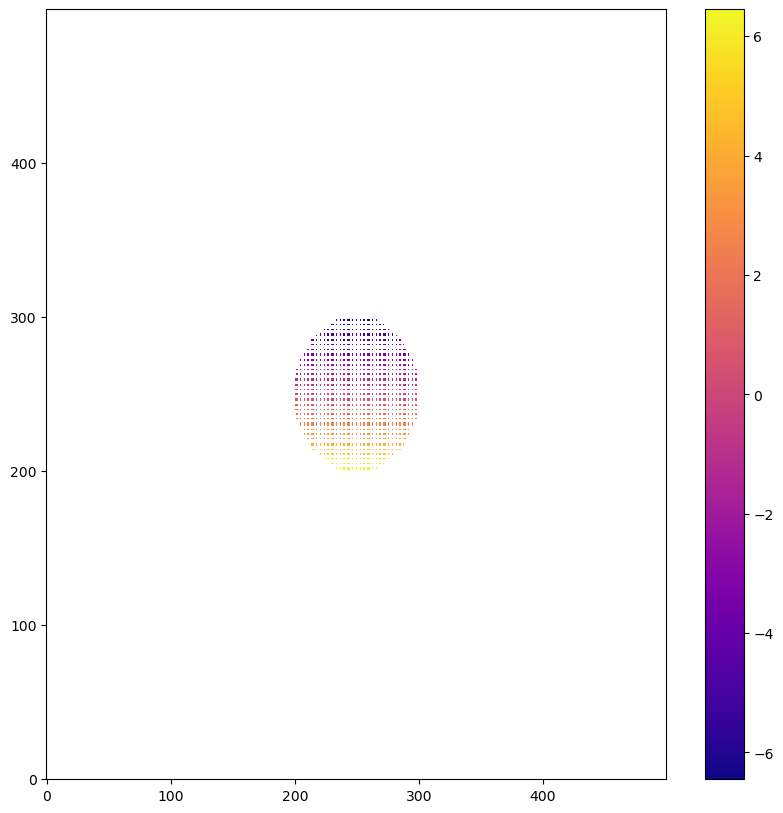

In [5]:

# Binning the data 
weightedHist, xb, yb = np.histogram2d(y, x, weights=vx, bins=(500, 500))
histNumbers, xb, yb = np.histogram2d(y, x, bins=(500, 500))

# Combining the histogrammed and non histogrammed data
finalHist = weightedHist/histNumbers
finalHist = np.ma.masked_where(histNumbers < 1, finalHist)

# Checking if we need to log the cmap and plotting
plt.figure(figsize=(10,10))
plt.imshow(finalHist, aspect="auto", cmap="plasma", origin="lower")
plt.colorbar()
plt.show()
